In [1]:
import sqlalchemy
from sqlalchemy.orm import sessionmaker, scoped_session
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
!pip install mysqlclient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysqlclient: filename=mysqlclient-2.1.1-cp310-cp310-linux_x86_64.whl size=60509 sha256=996efb0ed28d4e57f74c1c2c9996dc60a71280474116dc4b333e038e8ba73dbd
  Stored in directory: /home/jovyan/.cache/pip/wheels/7d/34/ba/a769c165b01646816afdf9bf792e847ef149693fee432b6b65
Successfully built mysqlclient


In [15]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [7]:
conn = sqlalchemy.create_engine('')

In [8]:
df = pd.read_sql("""
SELECT b.vus, type, name,
       avg(httpReqDurationMin) as http_req_duration_min,
       avg(httpReqDurationMax) as http_req_duration_max,
       avg(httpReqDurationAvg) as http_req_duration_avg,
       avg(httpReqDurationMed) as http_req_duration_med,
       avg(httpReqsCount) as http_reqs_count,
       avg(httpReqsRate) as http_reqs_rate,
       avg(testDuration) as test_duration_ms
FROM Result r
JOIN Benchmark b ON r.benchmarkId = b.id
GROUP BY type, vus, name
""", conn)

In [9]:
df['name'].unique()

array(['create-card', 'create-card-payment'], dtype=object)

In [10]:
VUS = df.sort_values(by="vus")['vus'].unique().tolist()
VUS

[1, 10, 25, 50, 100]

# Criação de Cartão

In [11]:
create_card_df = df[df['name'] == 'create-card'].sort_values(by="vus")
create_card_grpc_df = create_card_df[create_card_df['type'] == "GRPC"].sort_values(by="vus")
create_card_rest_df = create_card_df[create_card_df['type'] == "REST"].sort_values(by="vus")

## Número de Requisições por VUs

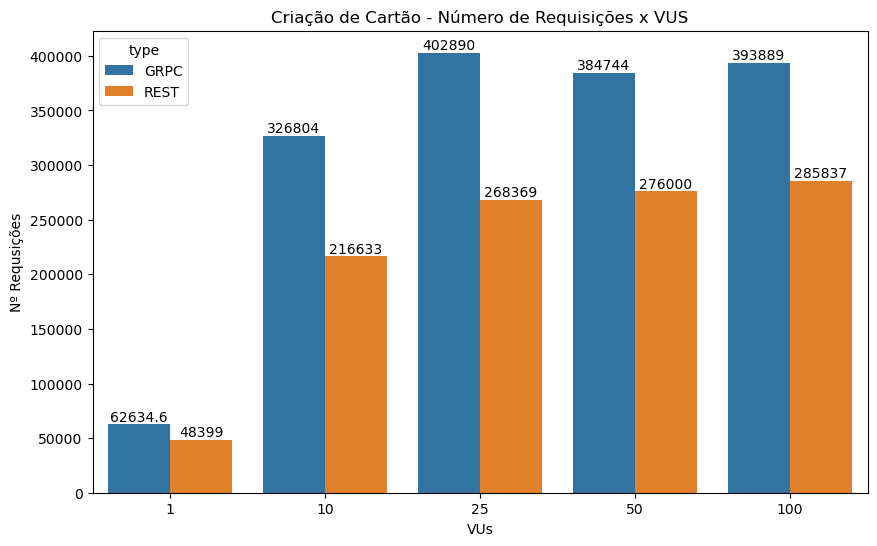

In [30]:
plt.figure(figsize=(10, 6))
plt.title("Criação de Cartão - Número de Requisições x VUS")
ax = sns.barplot(x="vus", y="http_reqs_count", hue="type", data=create_card_df, ci=None)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.ylabel('Nº Requsições')
plt.xlabel('VUs')
plt.show() 

## Throughput de Requisições (reqs/s) 

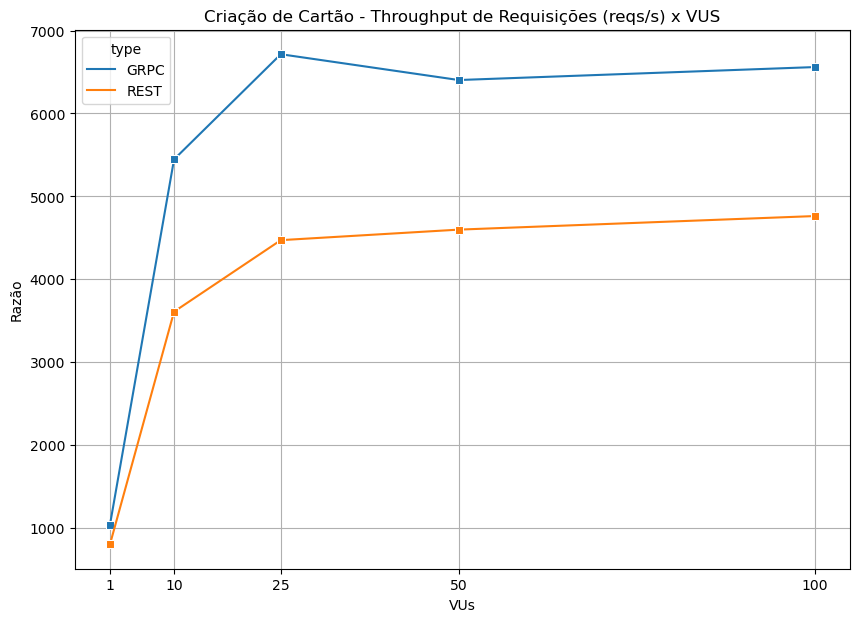

In [31]:
plt.figure(figsize=(10, 7))
plt.title("Criação de Cartão - Throughput de Requisições (reqs/s) x VUS")

plt.xticks(VUS)
sns.lineplot(data=create_card_df, x="vus", y="http_reqs_rate", hue="type", marker='s')
plt.grid()
plt.ylabel('Razão')
plt.xlabel('VUs')
plt.show()

## Tempo média da requisição

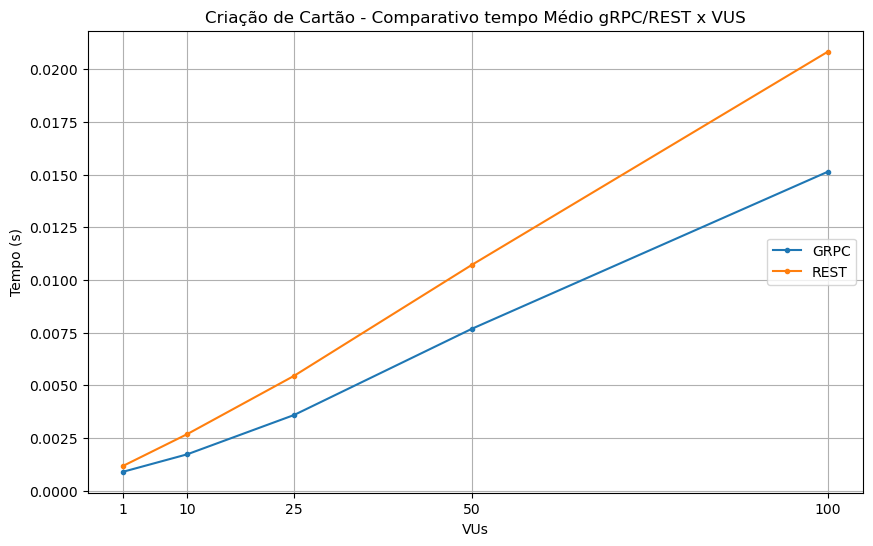

In [38]:
plt.figure(figsize=(10, 6))
plt.title("Criação de Cartão - Comparativo tempo Médio gRPC/REST x VUS")
plt.ylabel('Tempo (s)')
plt.xlabel('VUs')

plt.xticks(VUS)
plt.plot(create_card_grpc_df['vus'], create_card_grpc_df['http_req_duration_avg'] / 1000, marker=".", label="GRPC")
plt.plot(create_card_rest_df['vus'], create_card_rest_df['http_req_duration_avg'] / 1000, marker=".", label="REST")
leg = plt.legend(loc='center right')
plt.grid()
plt.show()

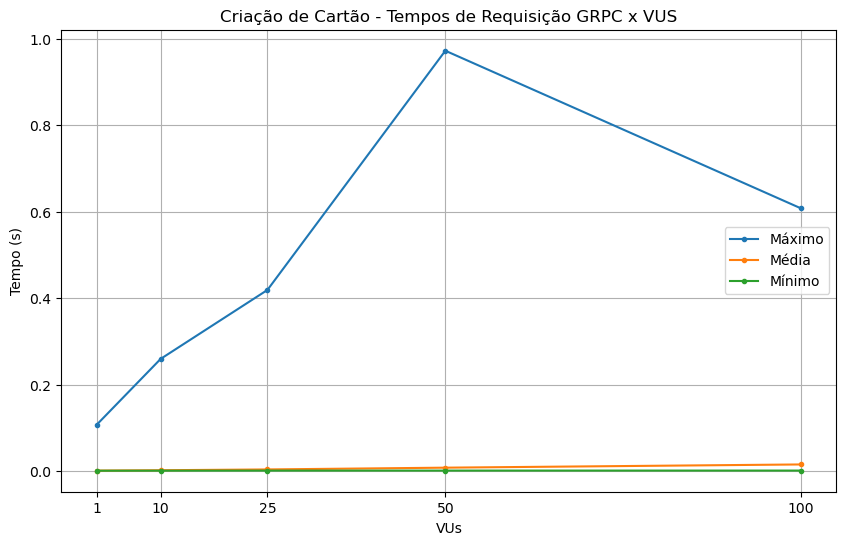

In [25]:
plt.figure(figsize=(10, 6))
plt.title("Criação de Cartão - Tempos de Requisição GRPC x VUS")
plt.ylabel('Tempo (s)')
plt.xlabel('VUs')

plt.xticks(VUS)
plt.plot(create_card_grpc_df['vus'], create_card_grpc_df['http_req_duration_max'] / 1000, marker=".", label="Máximo")
plt.plot(create_card_grpc_df['vus'], create_card_grpc_df['http_req_duration_avg'] / 1000, marker=".", label="Média")
plt.plot(create_card_grpc_df['vus'], create_card_grpc_df['http_req_duration_min'] / 1000, marker=".", label="Mínimo")

leg = plt.legend(loc='center right')
plt.grid()
plt.show()

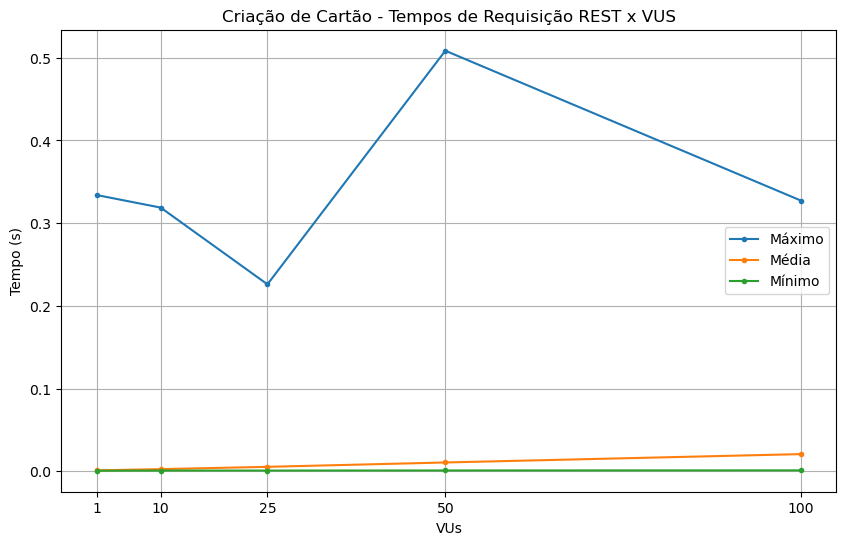

In [26]:
plt.figure(figsize=(10, 6))
plt.title("Criação de Cartão - Tempos de Requisição REST x VUS")
plt.ylabel('Tempo (s)')
plt.xlabel('VUs')

plt.xticks(VUS)
plt.plot(create_card_rest_df['vus'], create_card_rest_df['http_req_duration_max'] / 1000, marker=".", label="Máximo")
plt.plot(create_card_rest_df['vus'], create_card_rest_df['http_req_duration_avg'] / 1000, marker=".", label="Média")
plt.plot(create_card_rest_df['vus'], create_card_rest_df['http_req_duration_min'] / 1000, marker=".", label="Mínimo")
leg = plt.legend(loc='center right')
plt.grid()
plt.show()

# Criação de Pagamento de Cartão

In [27]:
create_card_payment_df = df[df['name'] == 'create-card-payment'].sort_values(by="vus")
create_card_payment_grpc_df = create_card_payment_df[create_card_payment_df['type'] == "GRPC"].sort_values(by="vus")
create_card_payment_rest_df = create_card_payment_df[create_card_payment_df['type'] == "REST"].sort_values(by="vus")

# Número de Requisições

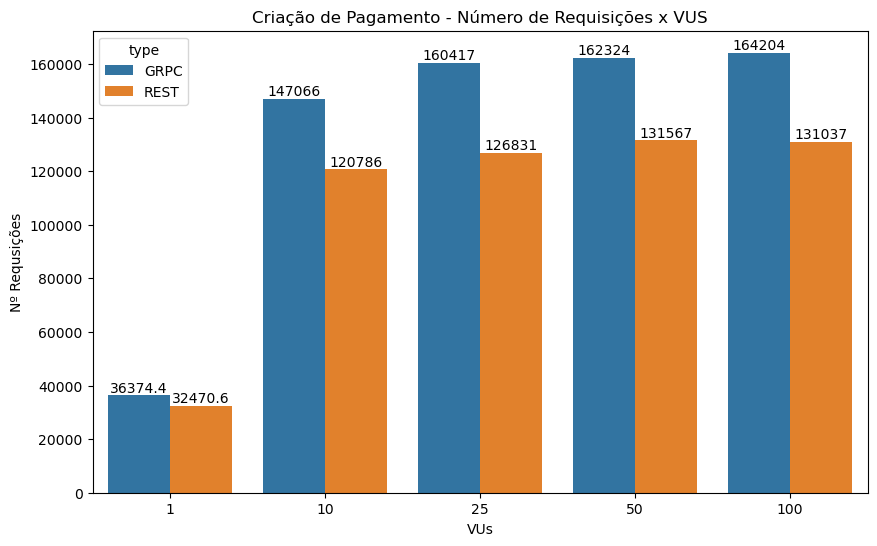

In [32]:
plt.figure(figsize=(10, 6))
plt.title("Criação de Pagamento - Número de Requisições x VUS")
ax = sns.barplot(x="vus", y="http_reqs_count", hue="type", data=create_card_payment_df, ci=None)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.ylabel('Nº Requsições')
plt.xlabel('VUs')
plt.show() 

## Throughput de Requisições (reqs/s)

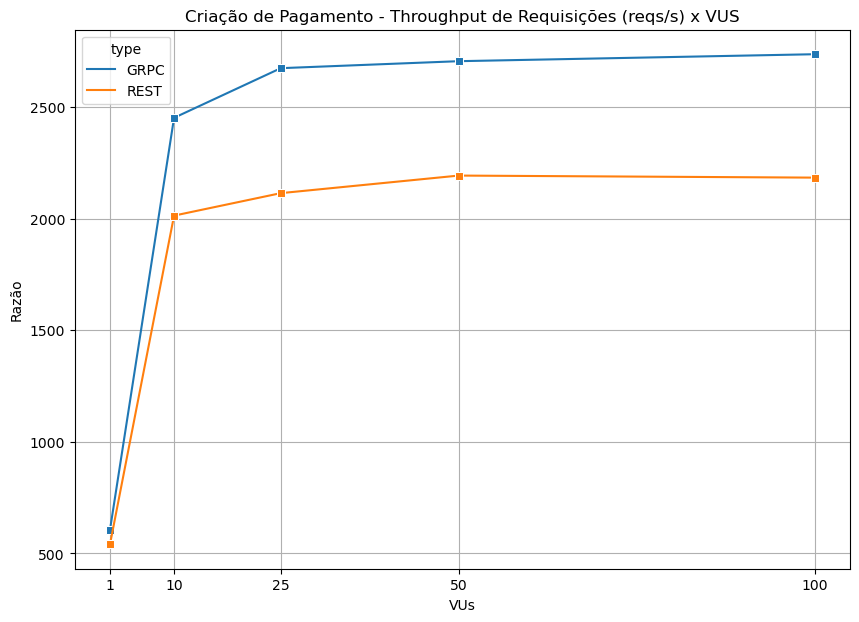

In [39]:
plt.figure(figsize=(10, 7))
plt.title("Criação de Pagamento - Throughput de Requisições (reqs/s) x VUS")

plt.xticks(VUS)
sns.lineplot(data=create_card_payment_df, x="vus", y="http_reqs_rate", hue="type", marker='s')
plt.grid()
plt.ylabel('Razão')
plt.xlabel('VUs')
plt.show()

## Tempo média da requisição

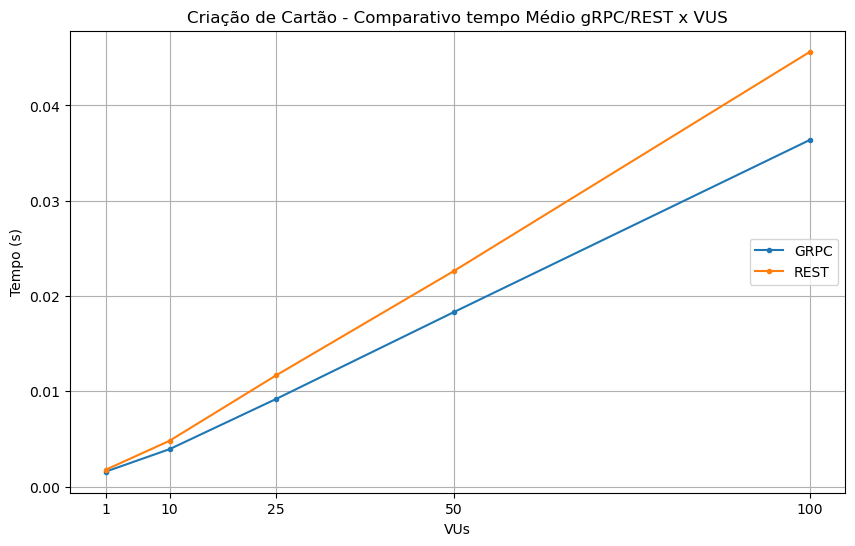

In [36]:
plt.figure(figsize=(10, 6))
plt.title("Criação de Cartão - Comparativo tempo Médio gRPC/REST x VUS")
plt.ylabel('Tempo (s)')
plt.xlabel('VUs')

plt.xticks(VUS)
plt.plot(VUS, create_card_payment_grpc_df['http_req_duration_avg'] / 1000, marker=".", label="GRPC")
plt.plot(VUS, create_card_payment_rest_df['http_req_duration_avg'] / 1000, marker=".", label="REST")
leg = plt.legend(loc='center right')
plt.grid()
plt.show()